In [1]:
import os
import sys
import warnings
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from yellowbrick.model_selection import FeatureImportances, LearningCurve
from yellowbrick.classifier import ROCAUC

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [69]:
df = pd.read_csv("../data/raw/supervised_dataset.csv")

In [70]:
df.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [71]:
df.describe()

,Unnamed: 0,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),num_sessions,num_users,num_unique_apis
count,1699.00000,1695.000000,1695.000000,1699.000000,1.699000e+03,1699.000000,1699.000000,1699.000000
mean,849.00000,1.501123,0.173226,61.648982,6.028341e+03,564.726898,406.263685,67.246616
std,490.60337,21.697558,0.283641,205.803273,4.665042e+04,1179.931200,960.718580,82.189214
min,0.00000,0.000003,0.001200,0.000000,1.000000e+00,2.000000,1.000000,0.000000
25%,424.50000,0.000707,0.009199,9.984756,6.300000e+01,5.000000,1.000000,14.000000
50%,849.00000,0.002574,0.018717,17.095238,1.950000e+02,164.000000,141.000000,37.000000
75%,1273.50000,0.024579,0.230769,41.349478,3.711500e+03,446.500000,308.500000,90.000000
max,1698.00000,852.929250,1.000000,3303.000000,1.352948e+06,9299.000000,8447.000000,524.000000


In [72]:
df.isna().sum()

Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    4
api_access_uniqueness             4
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64

In [73]:
df.nunique()

Unnamed: 0                        1699
_id                               1678
inter_api_access_duration(sec)    1630
api_access_uniqueness             1360
sequence_length(count)            1284
vsession_duration(min)             926
ip_type                              2
num_sessions                       679
num_users                          553
num_unique_apis                    282
source                               2
classification                       2
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1699 non-null   int64  
 1   _id                             1699 non-null   object 
 2   inter_api_access_duration(sec)  1695 non-null   float64
 3   api_access_uniqueness           1695 non-null   float64
 4   sequence_length(count)          1699 non-null   float64
 5   vsession_duration(min)          1699 non-null   int64  
 6   ip_type                         1699 non-null   object 
 7   num_sessions                    1699 non-null   float64
 8   num_users                       1699 non-null   float64
 9   num_unique_apis                 1699 non-null   float64
 10  source                          1699 non-null   object 
 11  classification                  1699 non-null   object 
dtypes: float64(6), int64(2), object(4)

In [75]:
df.fillna(value=0, inplace=True)

In [76]:
df.isna().sum()

Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64

In [77]:
df.shape

(1699, 12)

## `EDA`

In [78]:
def value_count_normal(df, feature):
    value_count = df[feature].value_counts()
    value_count_norm = df[feature].value_counts(normalize=True) * 100
    value_count_norm_concat = pd.concat([value_count, value_count_norm], axis=1)
    return value_count_norm_concat

In [79]:
def create_pie_plot(df, feature):
    n = len(value_count_normal(df, feature).index)
    plt.pie(value_count_normal(df, feature).iloc[:, 1],
           autopct='%1.2f%%', labels=value_count_normal(df, feature).index)
    return plt.show()

In [80]:
def create_dist_plot(df, feature):
    figure(figsize=(20, 8))
    sns.distplot(df[feature], kde=True)
    plt.title('{}'.format(feature))
    return plt.show()

In [81]:
def create_kde_plot(df, feature):
    figure(figsize=(20, 8))
    sns.kdeplot(x=feature, hue='classification', palette = 'Set2', shade=True, data=df)
    return plt.show()

In [82]:
def get_info(df, feature):
    match feature:
        case 'inter_api_access_duration(sec)' | 'api_access_uniqueness' | 'sequence_length(count)' | 'vsession_duration(min)' | 'num_sessions' | 'num_users' | 'num_unique_apis' :
            print("Description: \n{}".format(df[feature].describe()))
            print('*' * 50)
            print("Objective Type: \n{}".format(df[feature].dtype))
        case 'ip_type' | 'source' | 'classification' :
            print("Description: \n{}".format(df[feature].describe()))
            print('*' * 50)
            print("Objective Type: \n{}".format(df[feature].dtype))
            print('*' * 50)
            print("Value Count: \n{}".format(value_count_normal(df, feature)))
        case _:
            print("Error")

In [83]:
def get_report(df, feature):
    match feature:
        case 'inter_api_access_duration(sec)' | 'api_access_uniqueness' | 'sequence_length(count)' | 'vsession_duration(min)' | 'num_sessions' | 'num_users' | 'num_unique_apis' :
            get_info(df, feature)
            print('*'*50)
            create_dist_plot(df, feature)
        case 'ip_type' | 'source' | 'classification' :
            get_info(df, feature)
            print('*'*50)
            create_pie_plot(df, feature)
        case _:
            print("Error")

Description: 
count        1699
unique          2
top       default
freq         1542
Name: ip_type, dtype: object
**************************************************
Objective Type: 
object
**************************************************
Value Count: 
            ip_type   ip_type
default        1542  90.75927
datacenter      157   9.24073
**************************************************


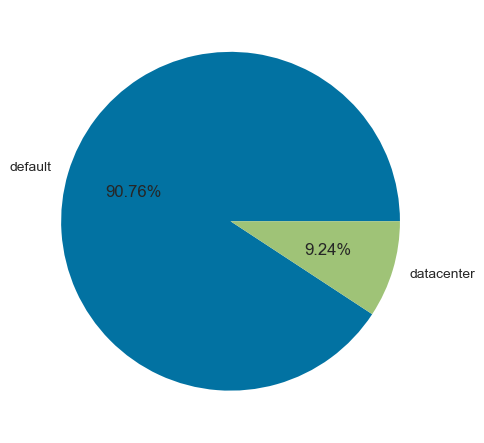

In [84]:
get_report(df, 'ip_type')

Description: 
count       1699
unique         2
top       normal
freq        1106
Name: classification, dtype: object
**************************************************
Objective Type: 
object
**************************************************
Value Count: 
         classification  classification
normal             1106       65.097116
outlier             593       34.902884
**************************************************


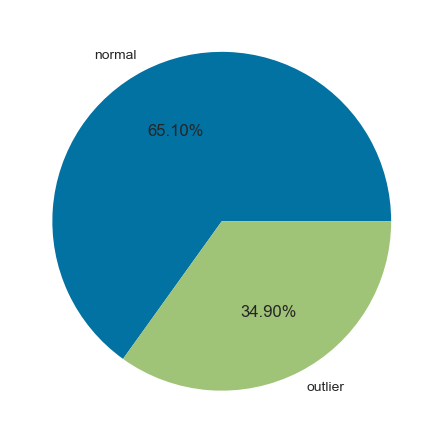

In [85]:
get_report(df, 'classification')

Description: 
count     1699
unique       2
top          E
freq      1499
Name: source, dtype: object
**************************************************
Objective Type: 
object
**************************************************
Value Count: 
   source    source
E    1499  88.22837
F     200  11.77163
**************************************************


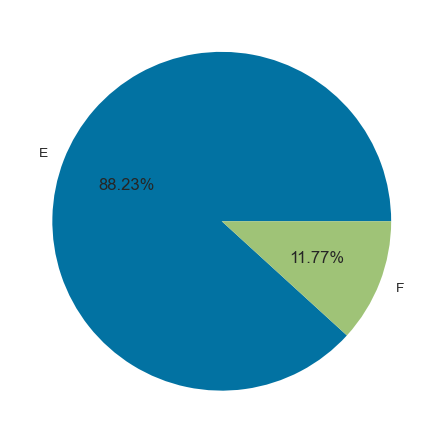

In [86]:
get_report(df, 'source')

Description: 
count    1699.000000
mean        1.497589
std        21.672109
min         0.000000
25%         0.000705
50%         0.002563
75%         0.024294
max       852.929250
Name: inter_api_access_duration(sec), dtype: float64
**************************************************
Objective Type: 
float64
**************************************************


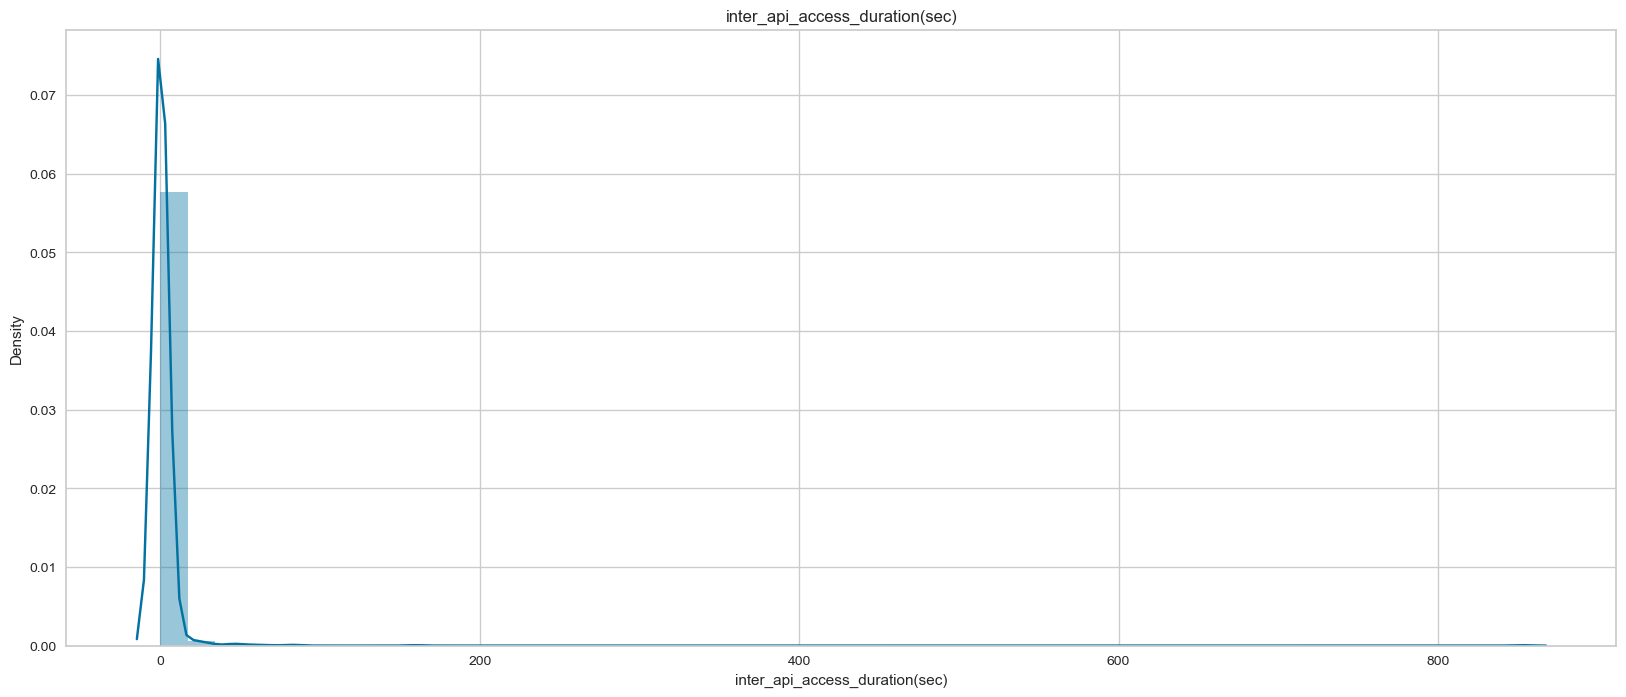

In [87]:
get_report(df, 'inter_api_access_duration(sec)')

Description: 
count    1699.000000
mean        0.172818
std         0.283431
min         0.000000
25%         0.009184
50%         0.018639
75%         0.230327
max         1.000000
Name: api_access_uniqueness, dtype: float64
**************************************************
Objective Type: 
float64
**************************************************


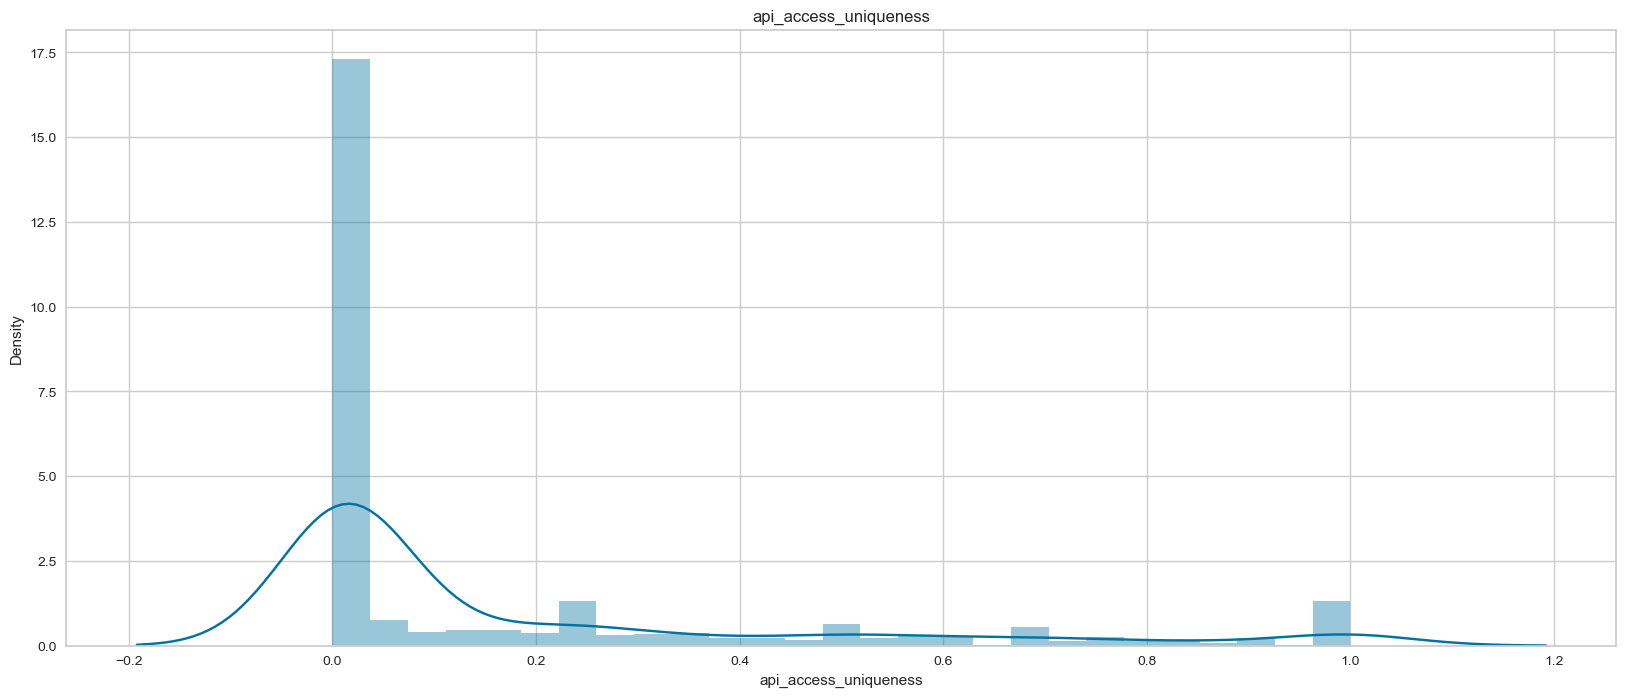

In [88]:
get_report(df, 'api_access_uniqueness')

Description: 
count    1699.000000
mean       61.648982
std       205.803273
min         0.000000
25%         9.984756
50%        17.095238
75%        41.349478
max      3303.000000
Name: sequence_length(count), dtype: float64
**************************************************
Objective Type: 
float64
**************************************************


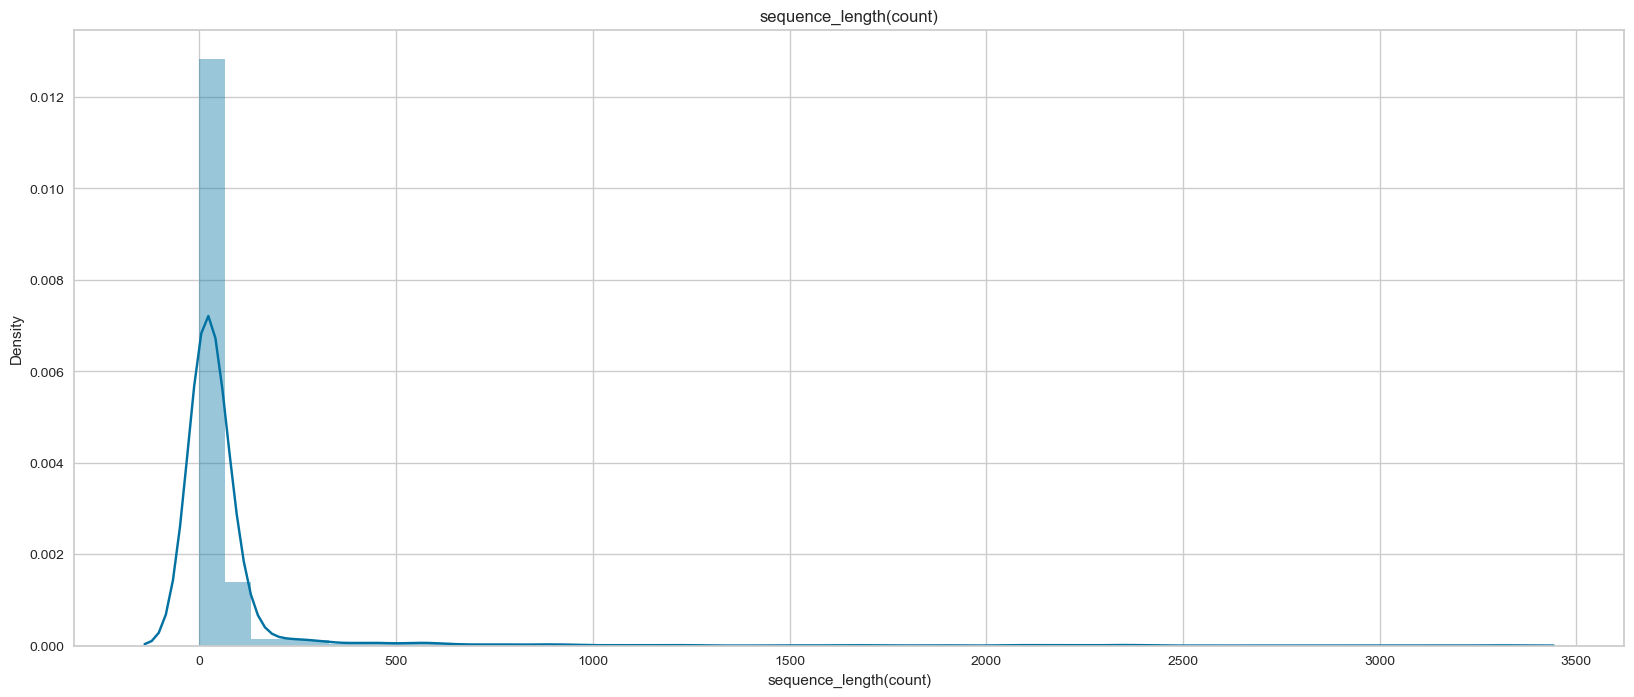

In [89]:
get_report(df, 'sequence_length(count)')

In [90]:
df.head(1)

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal


Description: 
count    1.699000e+03
mean     6.028341e+03
std      4.665042e+04
min      1.000000e+00
25%      6.300000e+01
50%      1.950000e+02
75%      3.711500e+03
max      1.352948e+06
Name: vsession_duration(min), dtype: float64
**************************************************
Objective Type: 
int64
**************************************************


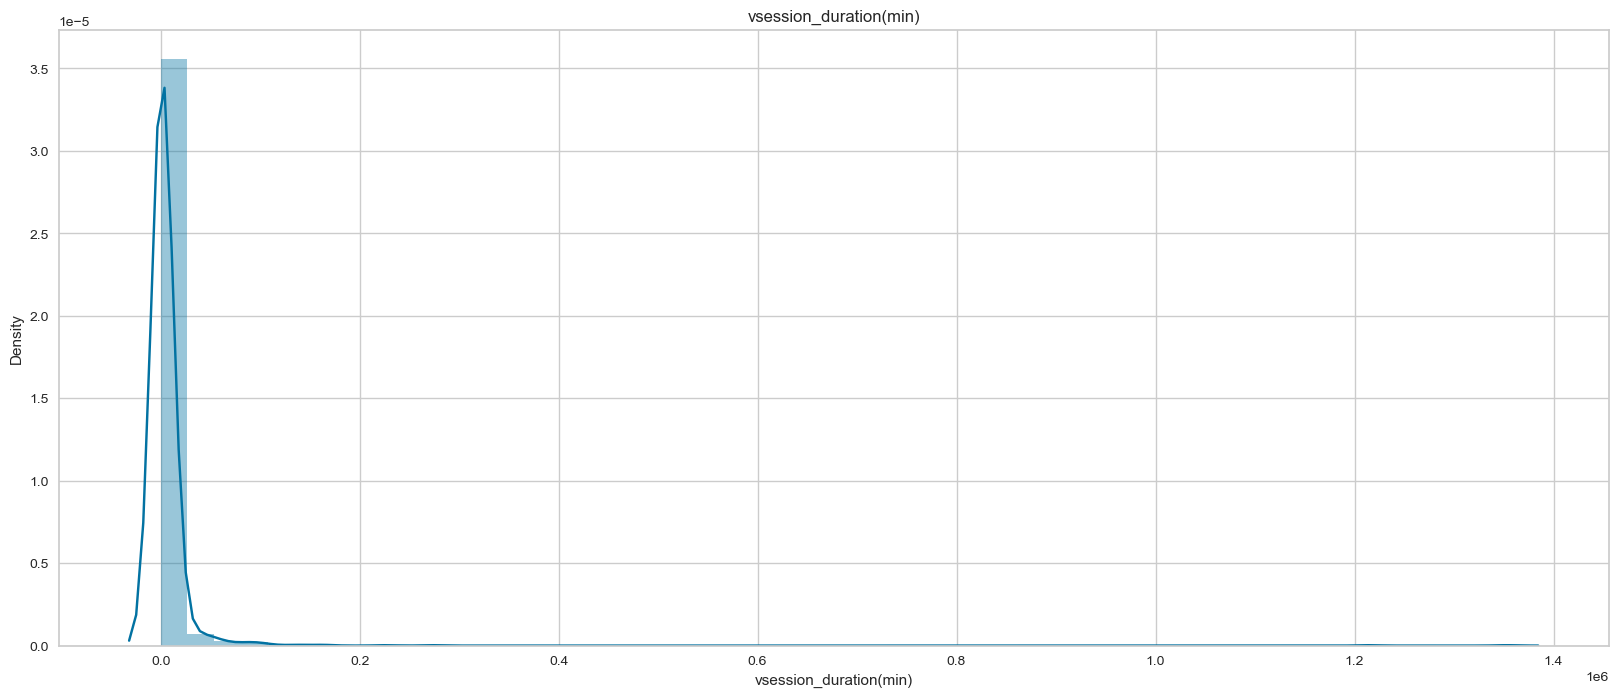

In [91]:
get_report(df, 'vsession_duration(min)')

Description: 
count    1699.000000
mean       67.246616
std        82.189214
min         0.000000
25%        14.000000
50%        37.000000
75%        90.000000
max       524.000000
Name: num_unique_apis, dtype: float64
**************************************************
Objective Type: 
float64
**************************************************


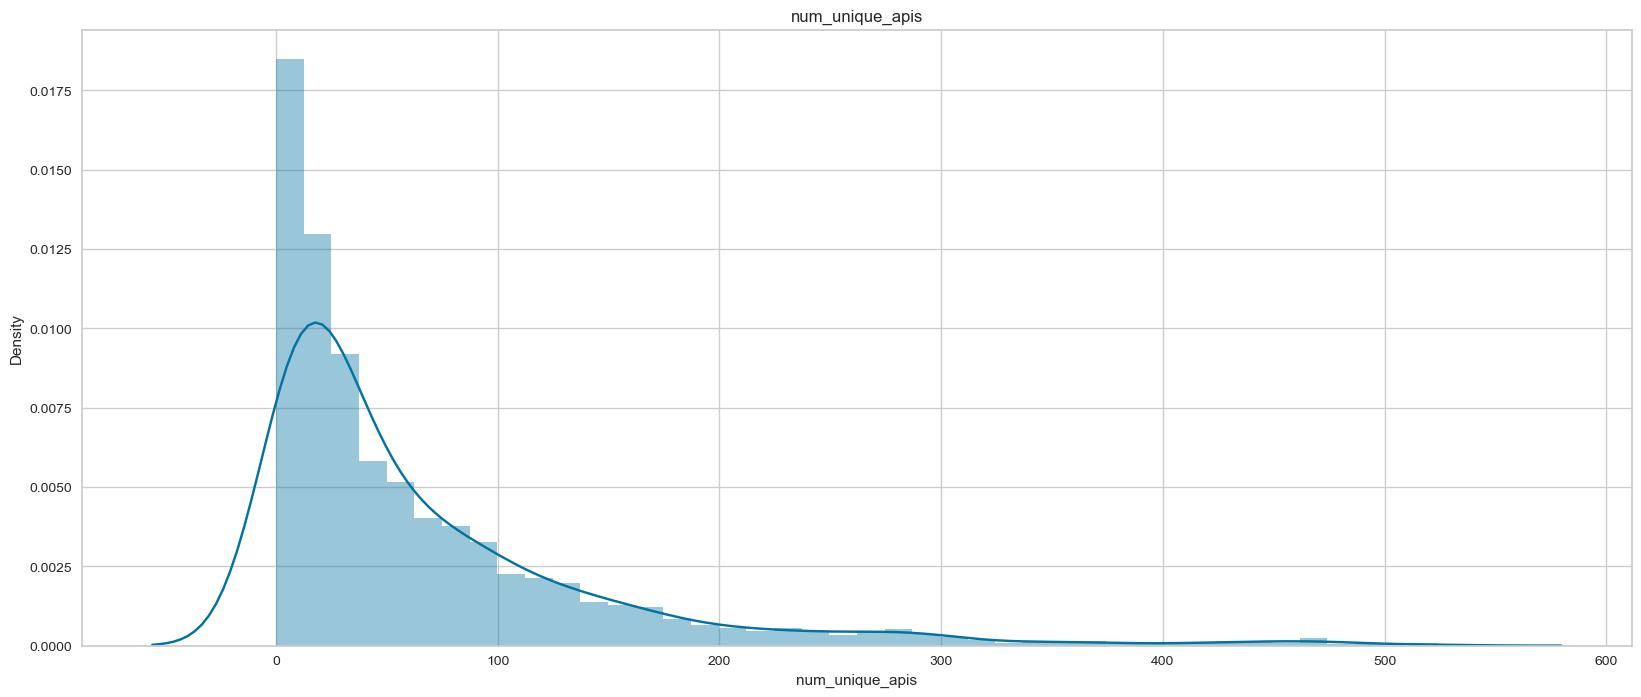

In [92]:
get_report(df, 'num_unique_apis')

(-0.25, 0.9)

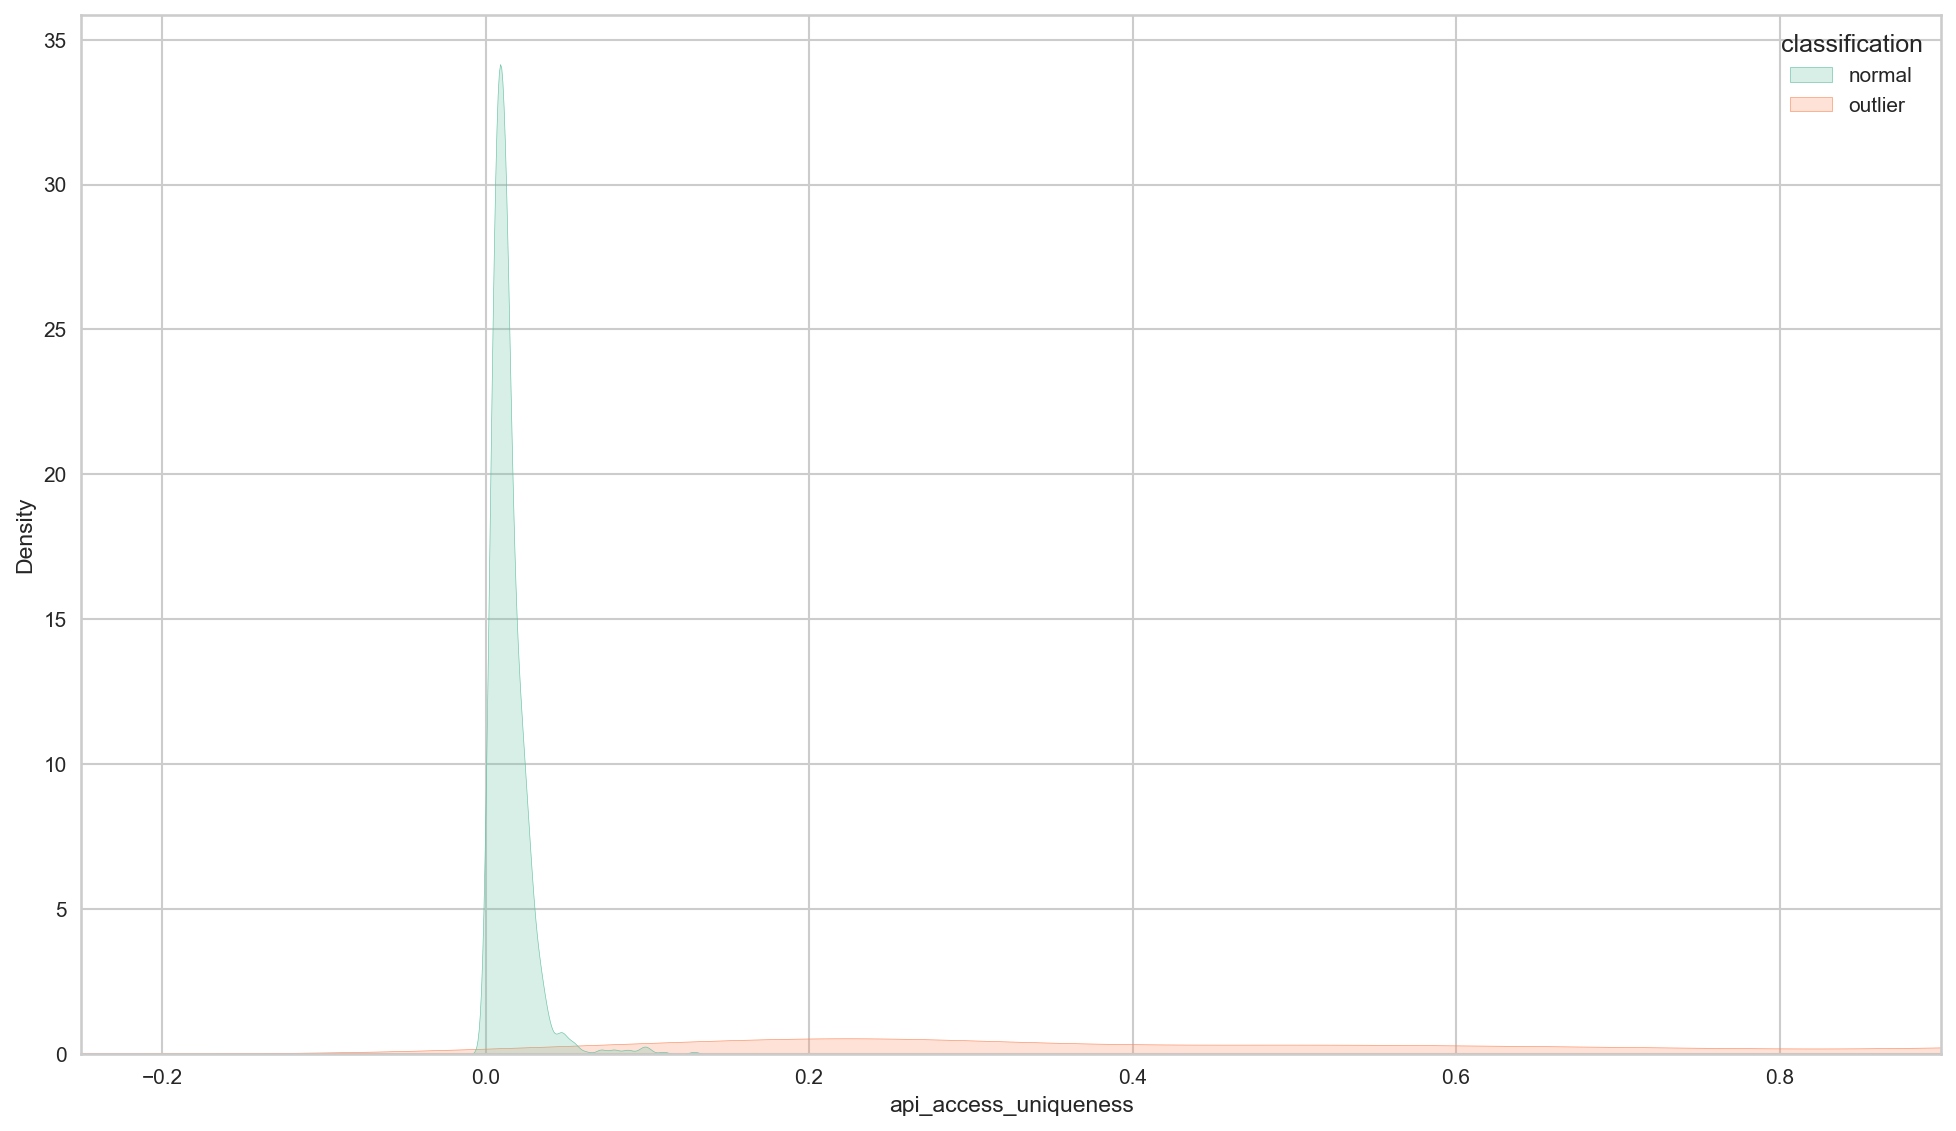

In [93]:
figure(figsize=(16, 9), dpi=150)
sns.kdeplot(x=df['api_access_uniqueness'], hue=df['classification'], palette='Set2', shade=True)
plt.xlim([-0.25, 0.9])

(0.0, 400.0)

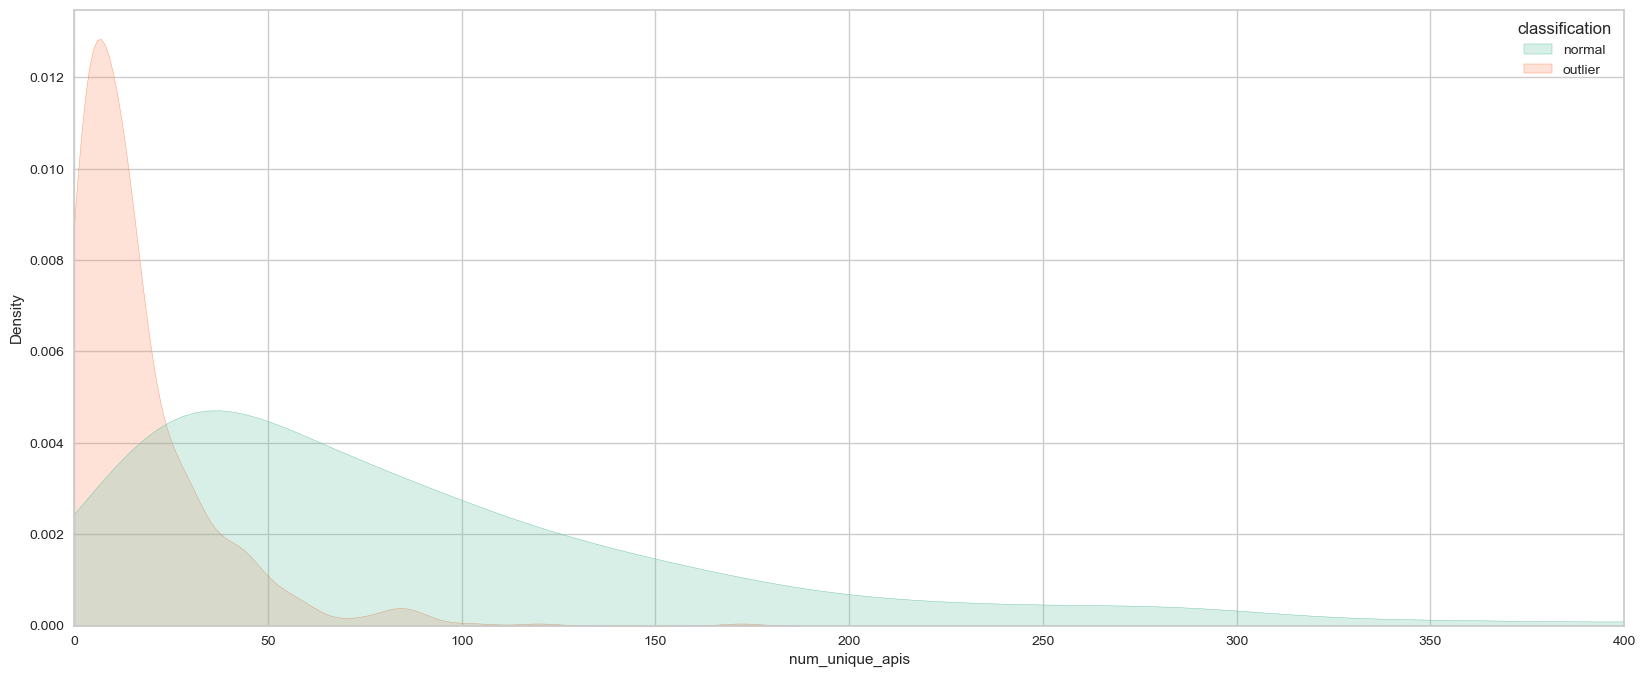

In [94]:
figure(figsize=(20, 8))
sns.kdeplot(x=df['num_unique_apis'], hue=df['classification'], palette='Set2', shade=True)
plt.xlim([0, 400])

(-100.0, 400.0)

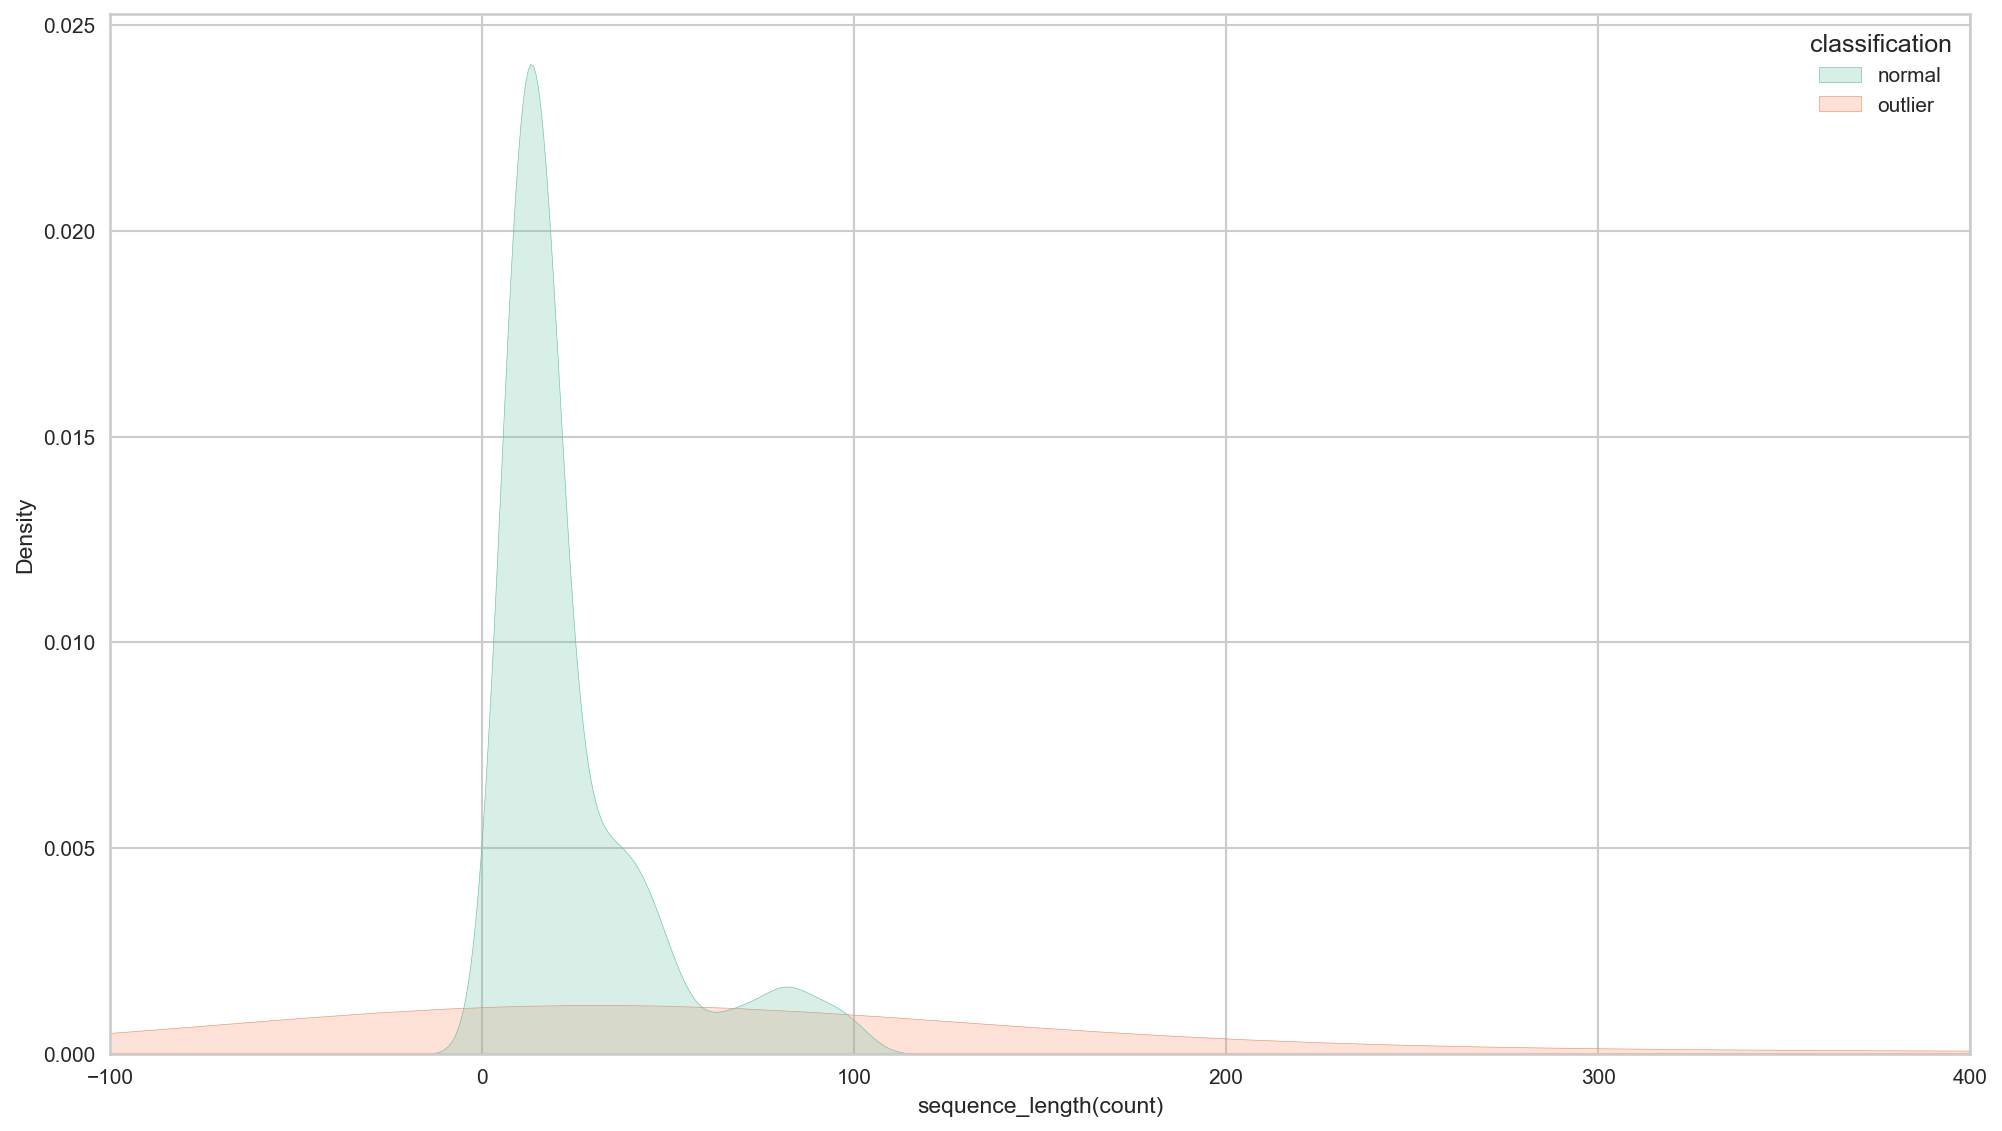

In [95]:
figure(figsize=(16, 9), dpi=150)
sns.kdeplot(x=df['sequence_length(count)'], hue=df['classification'], palette='Set2', shade=True)
plt.xlim([-100, 400])

<AxesSubplot: xlabel='api_access_uniqueness', ylabel='num_unique_apis'>

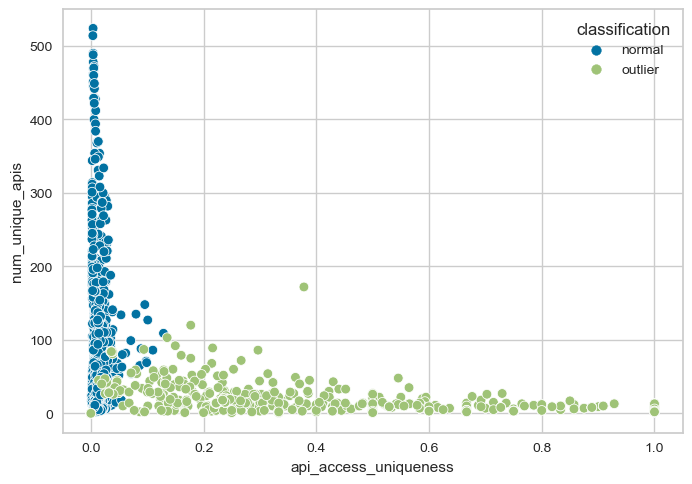

In [96]:
sns.scatterplot(x=df['api_access_uniqueness'], y=df['num_unique_apis'], hue=df['classification'])

<AxesSubplot: xlabel='num_users', ylabel='num_sessions'>

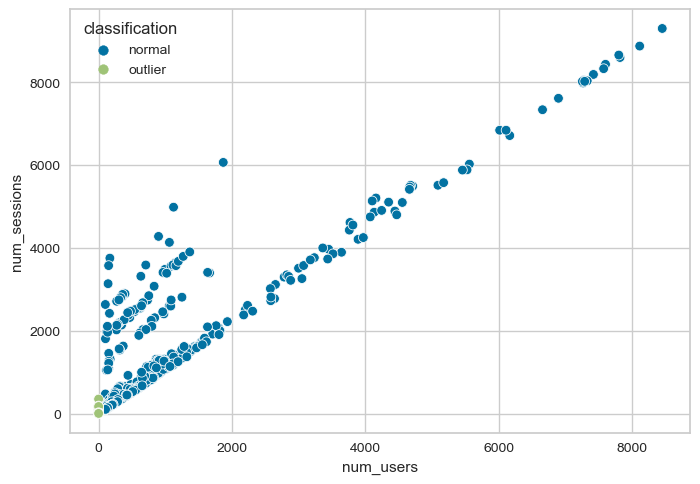

In [97]:
sns.scatterplot(x = df['num_users'], y=df['num_sessions'], hue=df['classification'])

<AxesSubplot: xlabel='num_sessions', ylabel='num_unique_apis'>

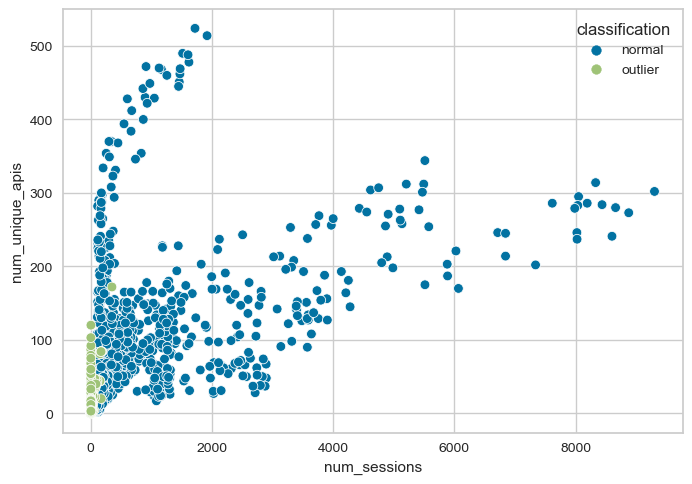

In [98]:
sns.scatterplot(x = df['num_sessions'], y=df['num_unique_apis'], hue=df['classification'])

<AxesSubplot: xlabel='num_users', ylabel='num_unique_apis'>

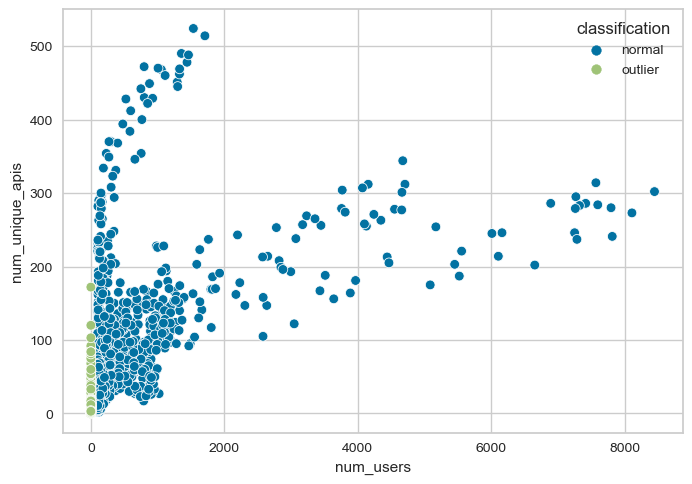

In [99]:
sns.scatterplot(x = df['num_users'], y=df['num_unique_apis'], hue=df['classification'])

<AxesSubplot: xlabel='source', ylabel='count'>

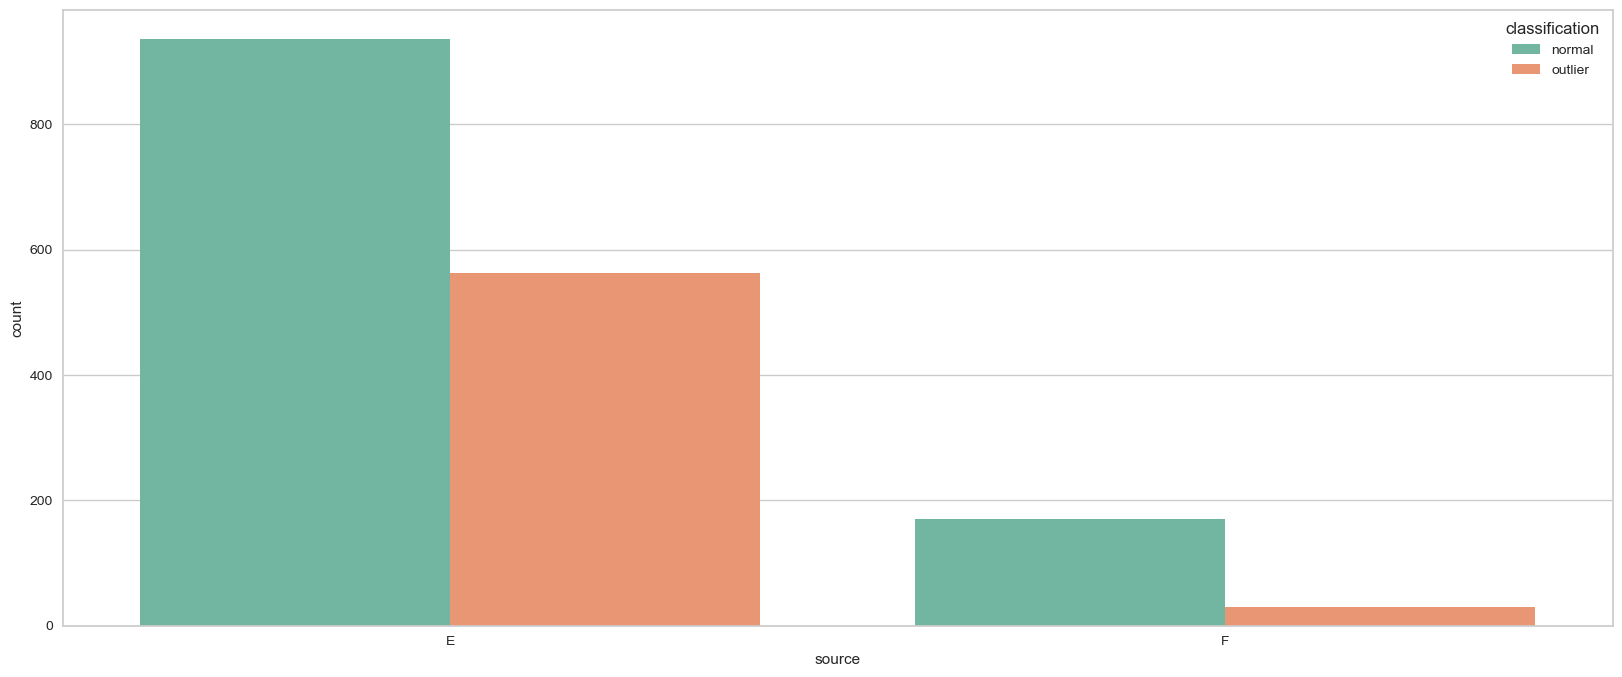

In [100]:
figure(figsize=(20, 8))
sns.countplot(x=df['source'], hue = df['classification'] , palette = 'Set2', data = df)

<AxesSubplot: xlabel='ip_type', ylabel='count'>

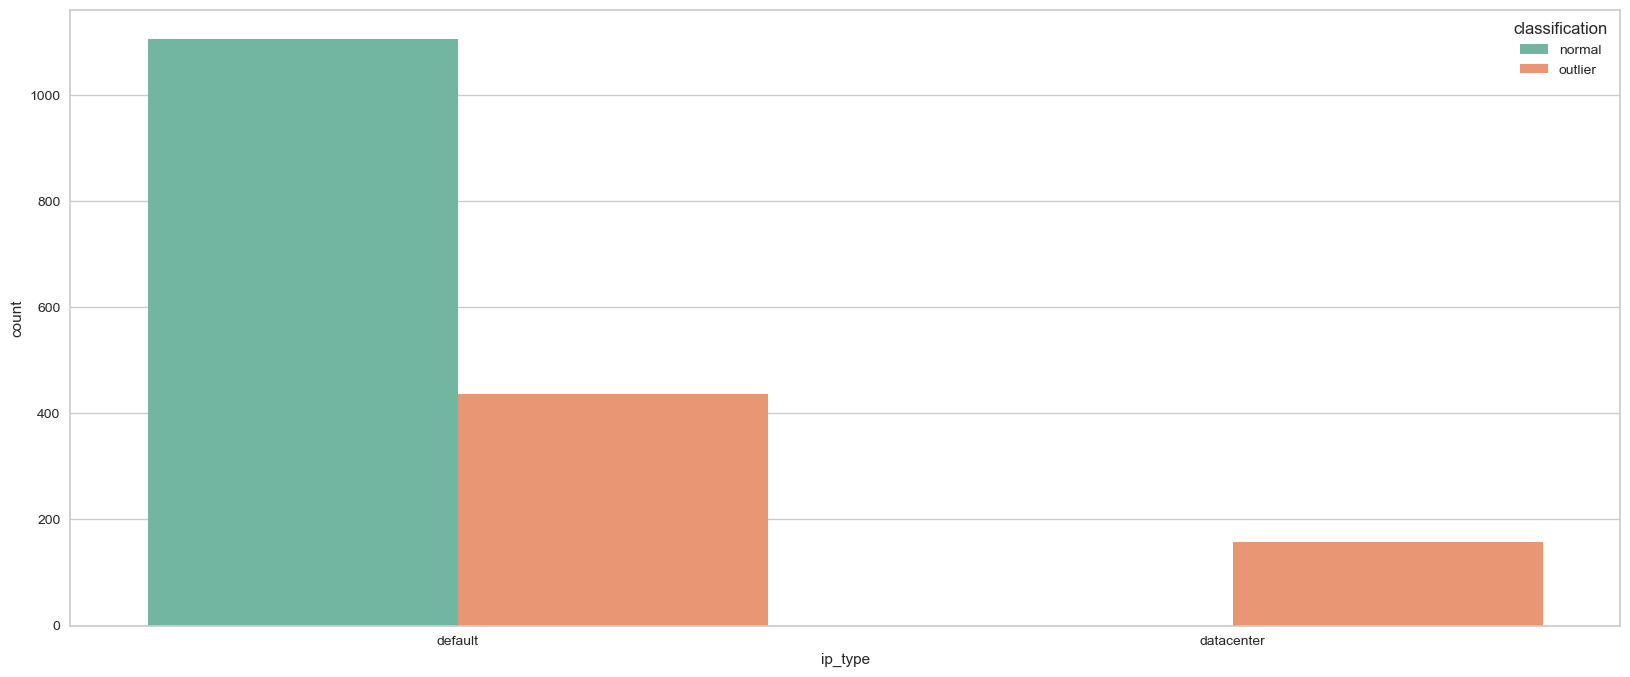

In [101]:
figure(figsize=(20, 8))
sns.countplot(x=df['ip_type'], hue = df['classification'] , palette = 'Set2', data = df)

<AxesSubplot: >

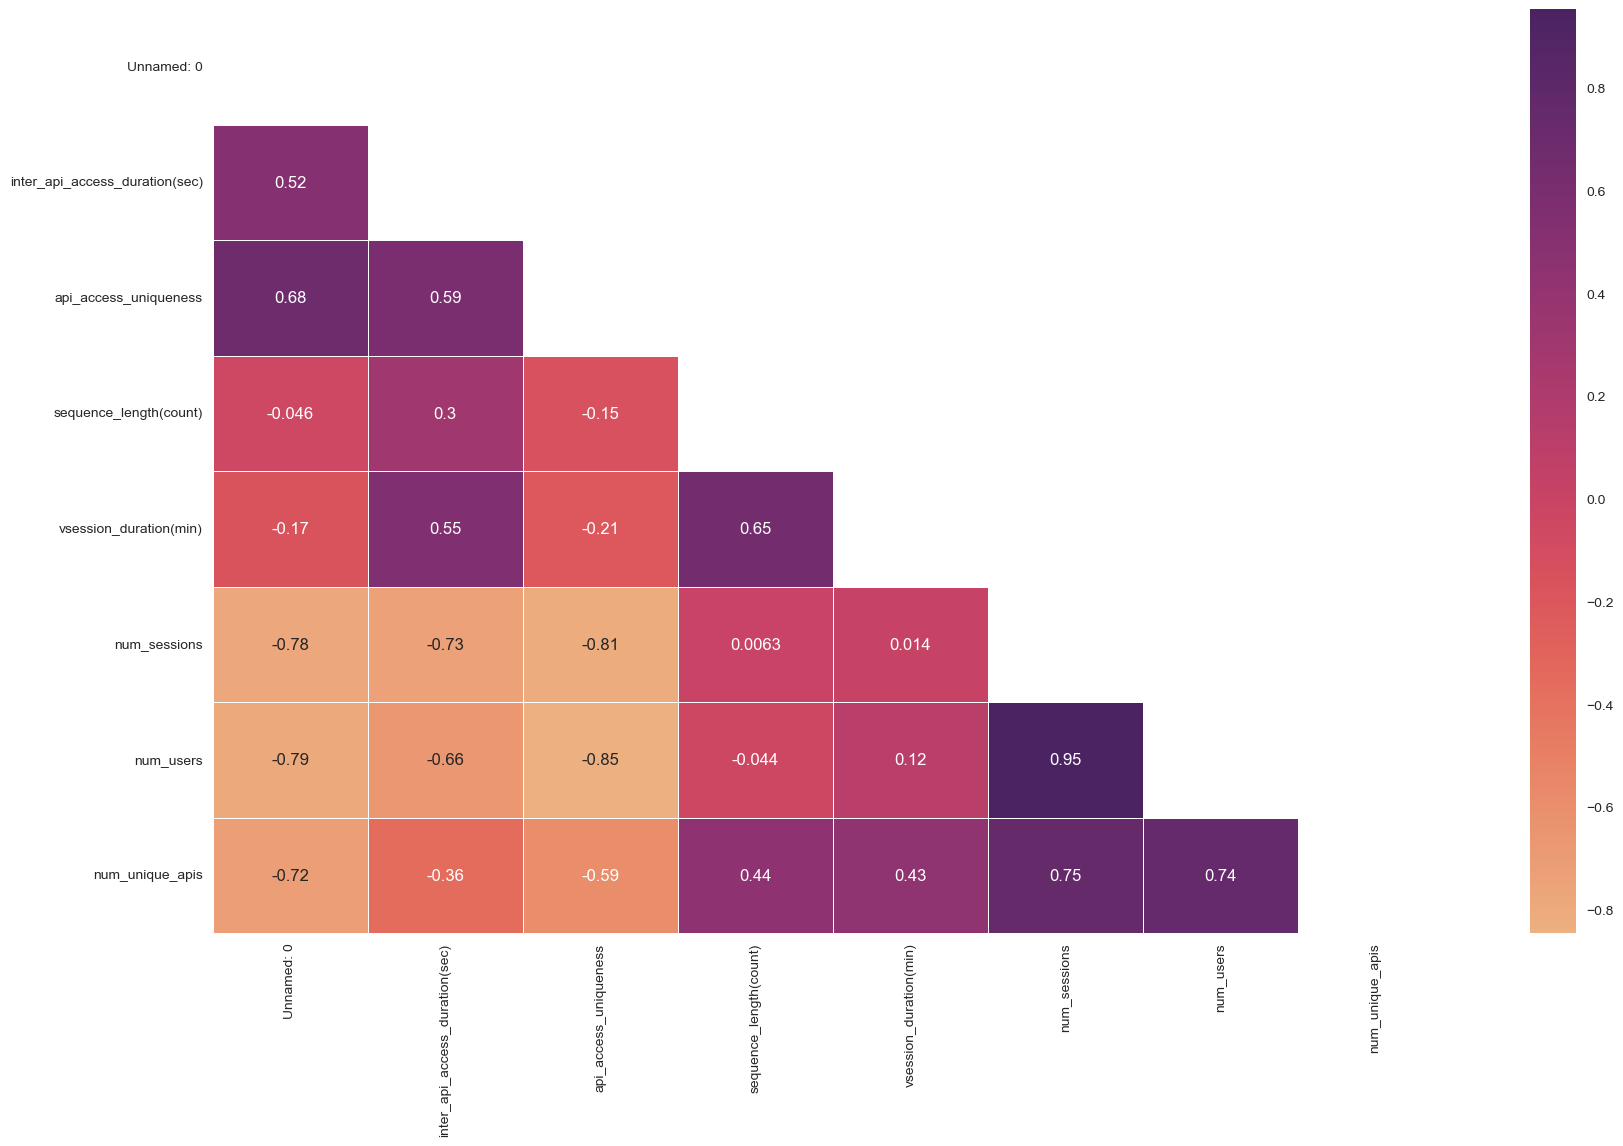

In [102]:
figure(figsize=(20, 12))
mask = np.zeros_like(df.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

In [103]:
def drop_features(df, feature):
    df = df.drop([feature], axis=1, inplace=True)
    return df

In [104]:
drop_features(df, '_id')
drop_features(df, 'Unnamed: 0')
drop_features(df, 'source')

In [105]:
df

,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,classification
0,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,normal
1,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,normal
2,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,normal
3,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,normal
4,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,normal
...,...,...,...,...,...,...,...,...,...
1694,45.603433,0.800000,15.000000,41044,datacenter,2.0,1.0,12.0,outlier
1695,852.929250,0.500000,2.000000,102352,datacenter,2.0,1.0,1.0,outlier
1696,59.243000,0.800000,5.000000,17773,datacenter,3.0,1.0,4.0,outlier
1697,0.754000,0.666667,3.000000,136,datacenter,2.0,1.0,2.0,outlier


In [106]:
df.columns

Index(['inter_api_access_duration(sec)', 'api_access_uniqueness',
       'sequence_length(count)', 'vsession_duration(min)', 'ip_type',
       'num_sessions', 'num_users', 'num_unique_apis', 'classification'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  1699 non-null   float64
 1   api_access_uniqueness           1699 non-null   float64
 2   sequence_length(count)          1699 non-null   float64
 3   vsession_duration(min)          1699 non-null   int64  
 4   ip_type                         1699 non-null   object 
 5   num_sessions                    1699 non-null   float64
 6   num_users                       1699 non-null   float64
 7   num_unique_apis                 1699 non-null   float64
 8   classification                  1699 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 119.6+ KB


In [108]:
class encoding(BaseEstimator, TransformerMixin):
    def __init__(self, columns=['classification', 'ip_type']):
        self.columns = columns
    def fit(self, df):
        return self
    def transform(self, df):
        oe = OrdinalEncoder()
        df[self.columns] = oe.fit_transform(df[self.columns])
        return df

In [109]:
class feature_scaling(BaseEstimator, TransformerMixin):
    def __init__(self, columns=['inter_api_access_duration(sec)', 'api_access_uniqueness', 'sequence_length(count)', 'vsession_duration(min)', 'num_sessions', 'num_users', 'num_unique_apis']):
        self.columns = columns
    def fit(self, df):
        return self
    def transform(self, df):
        if(set(self.columns).issubset(df.columns)):
            sc = StandardScaler()
            df[self.columns] = sc.fit_transform(df[self.columns])
            return df
        else:
            print("error")

In [110]:
class datatype_conv(BaseEstimator, TransformerMixin):
    def __init__(self, columns=['ip_type', 'num_sessions', 'source', 'classification']):
        self.columns = columns
    def fit(self, df):
        return self
    def transform(self, df):
        if (set(self.columns).issubset(df.columns)):
            df[self.columns] = df[self.columns].astype(float)
            return df
        else:
            print("error")

In [111]:
pipline = Pipeline([
    ('encoding', encoding()),
    ('feature_scaling', feature_scaling()),
    ('data_conv', datatype_conv())
])

In [112]:
pipline

Pipeline(steps=[('encoding', encoding()),
                ('feature_scaling', feature_scaling()),
                ('data_conv', datatype_conv())])

In [113]:
pipline.fit_transform(df)

error


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   inter_api_access_duration(sec)  1699 non-null   float64
 1   api_access_uniqueness           1699 non-null   float64
 2   sequence_length(count)          1699 non-null   float64
 3   vsession_duration(min)          1699 non-null   float64
 4   ip_type                         1699 non-null   float64
 5   num_sessions                    1699 non-null   float64
 6   num_users                       1699 non-null   float64
 7   num_unique_apis                 1699 non-null   float64
 8   classification                  1699 non-null   float64
dtypes: float64(9)
memory usage: 119.6 KB


In [115]:
list = []
for k in df.columns:
    list += [k]

In [116]:
def create_kde_plot(df, feature):
    sns.kdeplot(data=df, x=feature)

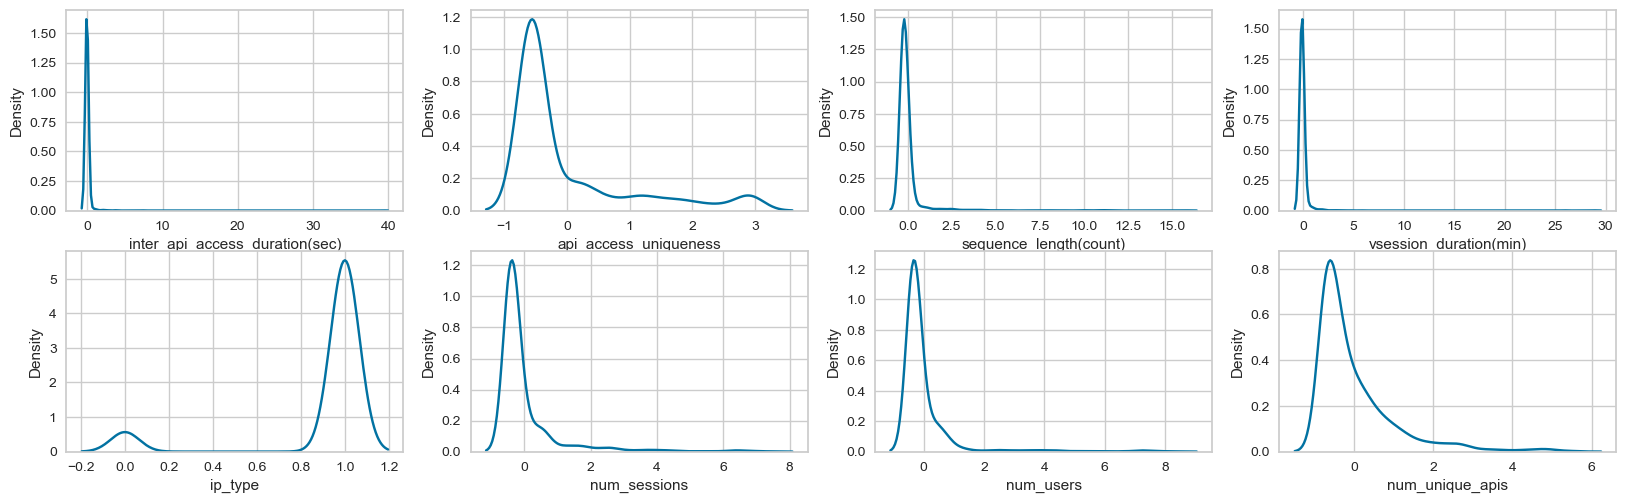

In [117]:
figure(figsize=(20, 12))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1)
    create_kde_plot(df, list[i])

In [118]:
## -0.9 <= df.corr() => 0.9
## if and only if this condition is applicable then we can say that the columns have multicolinarity

<AxesSubplot: >

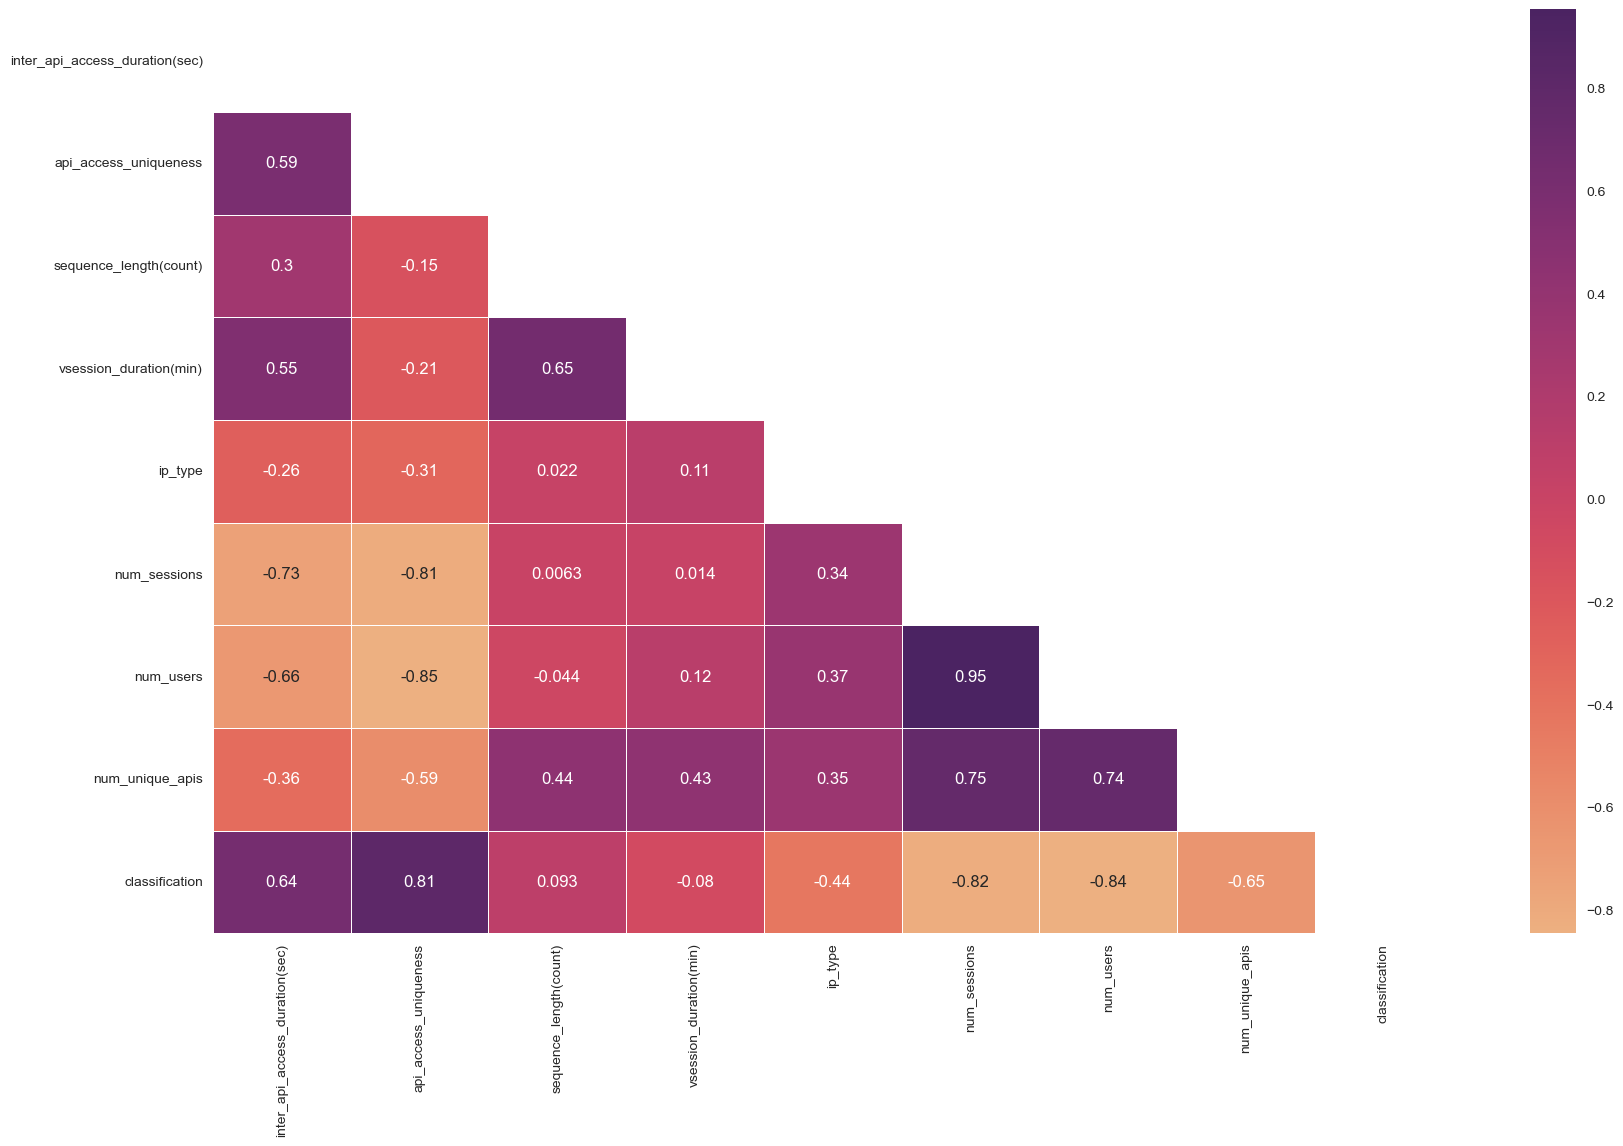

In [119]:
figure(figsize=(20, 12))
mask = np.zeros_like(df.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

<AxesSubplot: >

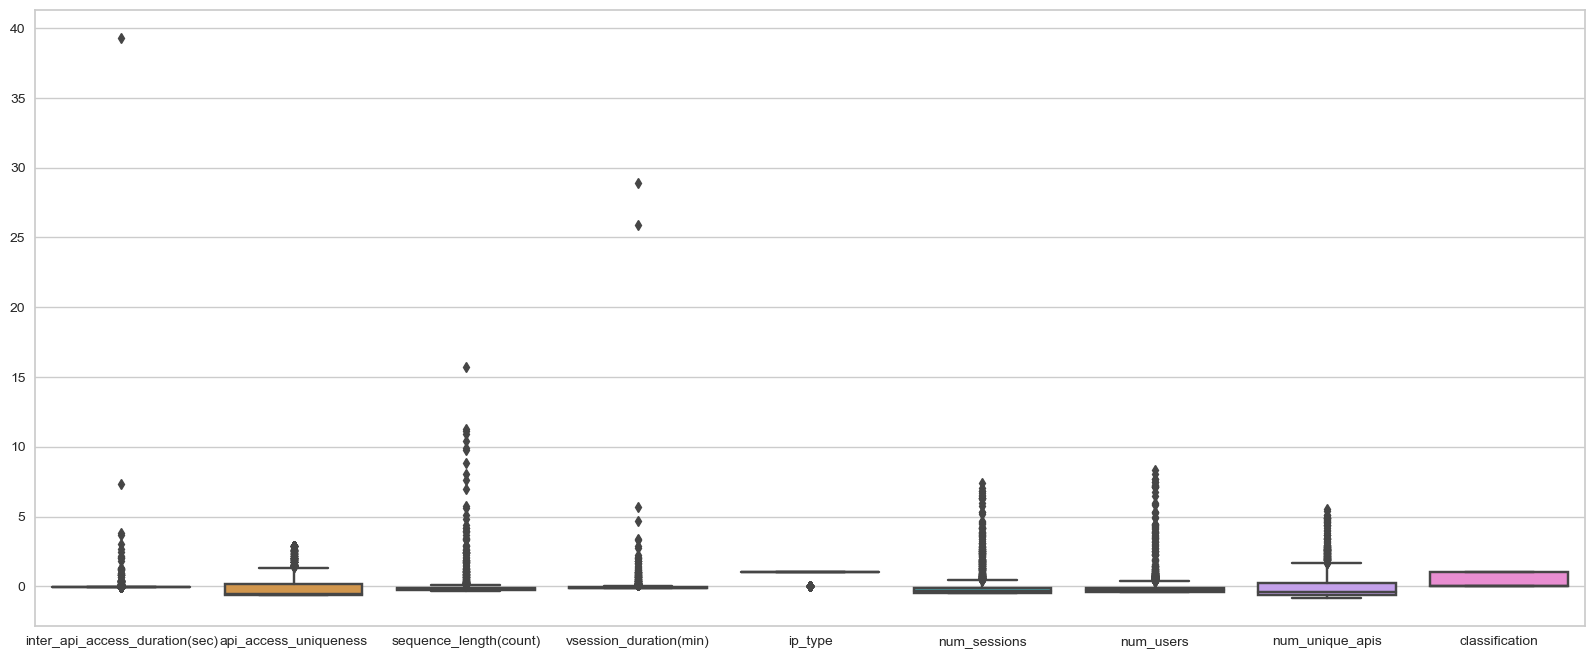

In [120]:
figure(figsize=(20, 8))
sns.boxplot(df)

In [121]:
def oultliers_threshold_iqr(df, feature, th1, th3):
    Q1 = df[feature].quantile(th1)
    Q3 = df[feature].quantile(th3)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [122]:
for i in df.columns:
    if i != 'classification':
        print('################################')
        print(i, ":", oultliers_threshold_iqr(df, i, th1=0.05, th3=0.85))
    else:
        pass

################################
inter_api_access_duration(sec) : (-0.05132722038890786, -0.07979853974489062)
################################
api_access_uniqueness : (3.7862243324230302, -3.231176422625949)
################################
sequence_length(count) : (0.5043944663017905, -0.7587324324732703)
################################
vsession_duration(min) : (0.19633489092474446, -0.3245511457558631)
################################
ip_type : (2.5, -1.5)
################################
num_sessions : (1.8095559721055228, -1.8490222585742682)
################################
num_users : (1.398309293431693, -1.51411856268541)
################################
num_unique_apis : (3.10963685573389, -3.1363298599777747)


In [123]:
def check_outliers_iqr(df, feature):
    upper_limit, lower_limit = oultliers_threshold_iqr(df, feature, th1=0.05, th3=0.85)
    if df[(df[feature] > upper_limit) | (df[feature] < lower_limit)].any(axis=None):
        return True
    else:
        return False

In [124]:
from tabulate import tabulate
def replace_with_thresholds_iqr(df, features, th1=0.05, th3=0.85, replace=True):
    data = []
    for feature in features:
        if feature != 'classification':
            outliers = check_outliers_iqr(df, feature)
            count = None
            upper_limit, lower_limit = oultliers_threshold_iqr(df, feature, th1=0.05, th3=0.85)
            if outliers:
                count = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)][feature].count()
                if replace:
                    if lower_limit < 0:
                        df.loc[(df[feature] > upper_limit), feature] = upper_limit
                    else:
                        df.loc[(df[feature] < lower_limit), feature] = lower_limit
                        df.loc[(df[feature] > upper_limit), feature] = upper_limit
            outliers_status = check_outliers_iqr(df, feature)
            data.append([outliers, outliers_status, count, feature, upper_limit, lower_limit ])
    table = tabulate(data, headers=['inter_api_access_duration(sec)', 'api_access_uniqueness','sequence_length(count)', 'vsession_duration(min)', 'ip_type', 'num_sessions', 'num_users', 'num_unique_apis', 'source'], tablefmt='rst', numalign='right')
    print(table)

In [125]:
replace_with_thresholds_iqr(df, df.columns, th1=0.05, th3=0.95)

================================  =======================  ========================  ==============================  ==========  ==============
inter_api_access_duration(sec)    api_access_uniqueness      sequence_length(count)  vsession_duration(min)             ip_type    num_sessions
================================  =======================  ========================  ==============================  ==========  ==============
True                              False                                         200  inter_api_access_duration(sec)  -0.0513272      -0.0797985
False                             False                                              api_access_uniqueness              3.78622        -3.23118
True                              False                                          94  sequence_length(count)            0.504394       -0.758732
True                              False                                          96  vsession_duration(min)            0.196335       -0

<AxesSubplot: >

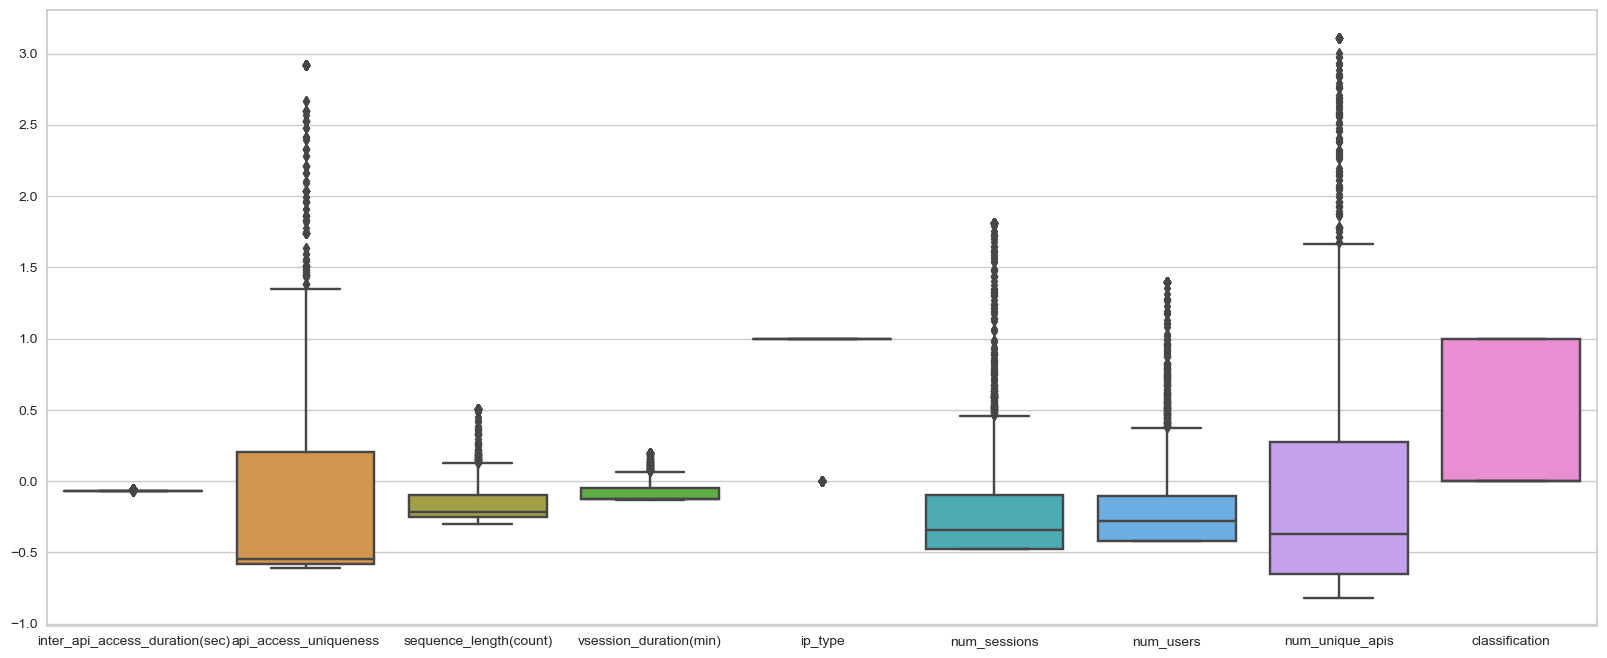

In [126]:
figure(figsize=(20, 8))
sns.boxplot(df)

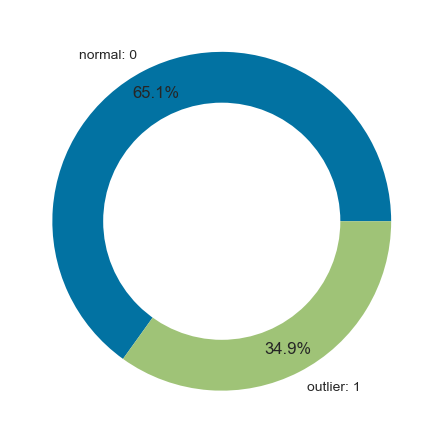

In [127]:
label = ['normal: 0', 'outlier: 1']
plt.pie(df['classification'].value_counts(), labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
donut_plot = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(donut_plot)

In [128]:
df.skew()

inter_api_access_duration(sec)    1.961324
api_access_uniqueness             1.785558
sequence_length(count)            2.049696
vsession_duration(min)            1.884398
ip_type                          -2.817354
num_sessions                      2.103799
num_users                         2.035194
num_unique_apis                   1.770319
classification                    0.634010
dtype: float64

In [129]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [130]:
models = {
    'Logistic_Regression': LogisticRegression(C=0.04, penalty='l2', solver='liblinear', max_iter=5000, multi_class='ovr'),
    'Navie_Bayes': GaussianNB(),
    'Random_Forest': RandomForestClassifier(n_estimators=300, criterion='gini'),
    'Ada_boost': AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='gini'), n_estimators=100),
    'Gradient_boost': GradientBoostingClassifier(),
    'Bagging_Classifer': BaggingClassifier(n_estimators=500, max_features=0.5, max_samples=1.0),
    'knn_classifier': KNeighborsClassifier(n_neighbors=2),
    'Decision_tree': DecisionTreeClassifier(),
    #'Extr_tree': ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0),
}

In [131]:
def explainable_ai(model):
    match model:
        case GaussianNB() | BaggingClassifier() | KNeighborsClassifier():
            print("Not suported")
        case _:
            fig_1 = FeatureImportances(model)
            fig_1.fit(x_train, y_train)
            fig_1.show()
            visualizer = ROCAUC(model)
            visualizer.fit(x_train, y_train)     
            visualizer.score(x_test, y_test)        
            visualizer.show()

In [132]:
def artifacts(model_name):
    metrics = """
    Accuracy: {:10.4f}
    ![Confusion Matrix](plot.png)
    """.format(acc)
    os.mkdir(f"./artifacts/metrics/{model_name}")
    with open(f"./artifacts/metrics/{model_name}/metrics.txt", "w") as outfile:
        outfile.write(metrics)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, cmap='Blues', fmt='.2%')
    plt.savefig(f"./artifacts/metrics/{model_name}/plot.png")

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [134]:
accuracy = []
model_name_1 = []
def train_model(model, model_name, x=x_train, y=y_train, x_test = x_test):
    print("##########################################################################")
    model = model.fit(x, y)
    y_pred = model.predict(x_test)
    acc = model.score(x_test, y_test)
    print(model_name, ":", accuracy_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    model_name_1.append(model_name)
    print("--------------------------------------------------------------------------")
    print('--------------------------------------------------------------------------')
    report = classification_report(y_test, y_pred)
    print(report)
    explainable_ai(model)

##########################################################################
Logistic_Regression : 0.9725490196078431
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       327
         1.0       1.00      0.92      0.96       183

    accuracy                           0.97       510
   macro avg       0.98      0.96      0.97       510
weighted avg       0.97      0.97      0.97       510



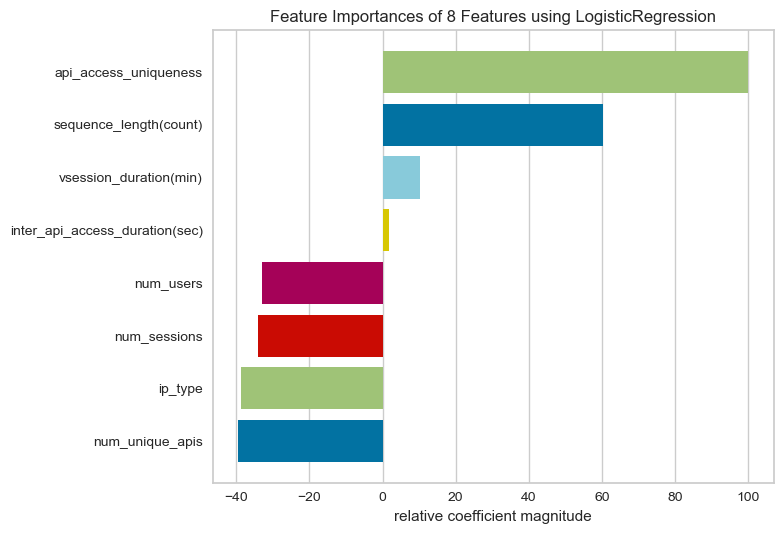

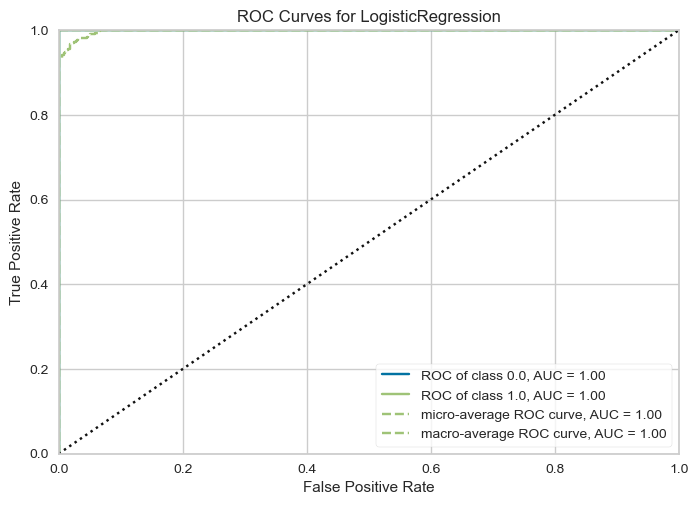

##########################################################################
Navie_Bayes : 1.0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       1.00      1.00      1.00       183

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

Not suported
##########################################################################
Random_Forest : 1.0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       1.00      1.00      1.00       183

    accu

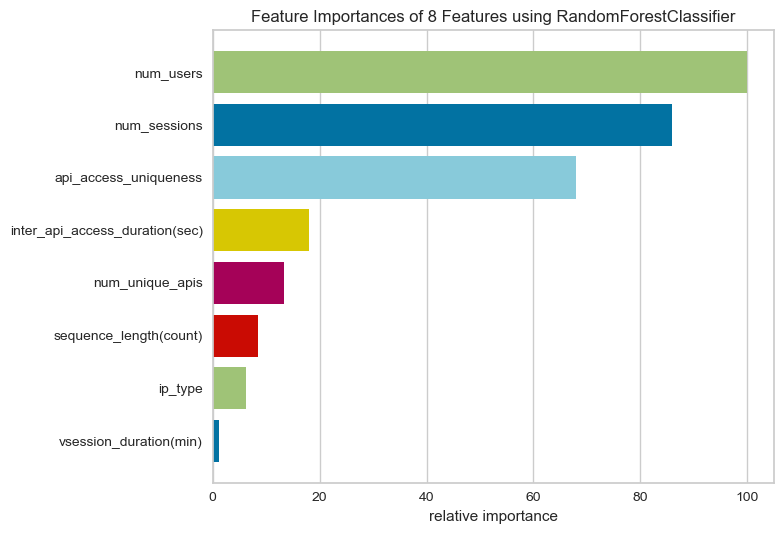

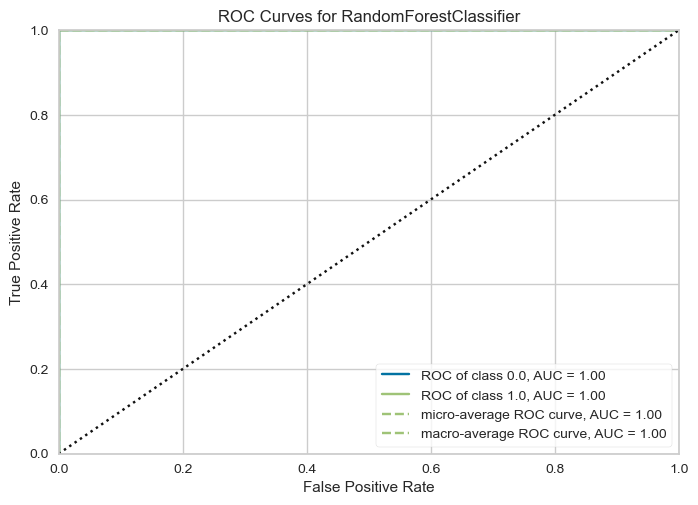

##########################################################################
Ada_boost : 1.0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       1.00      1.00      1.00       183

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



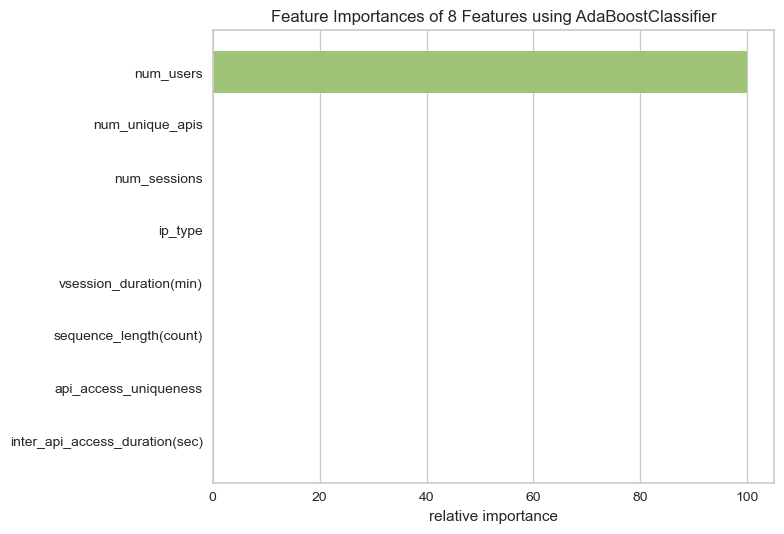

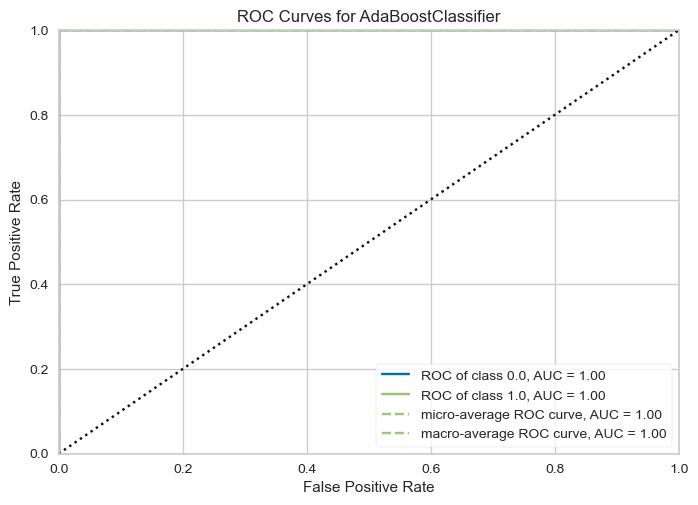

##########################################################################
Gradient_boost : 1.0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       1.00      1.00      1.00       183

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



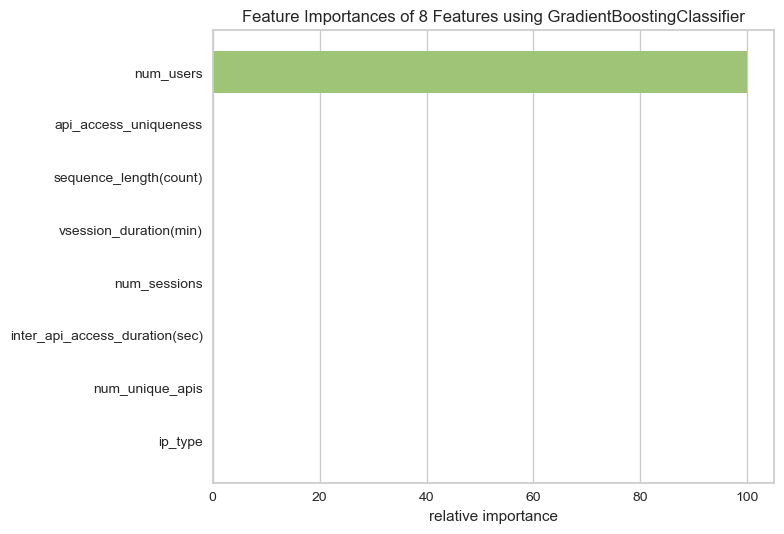

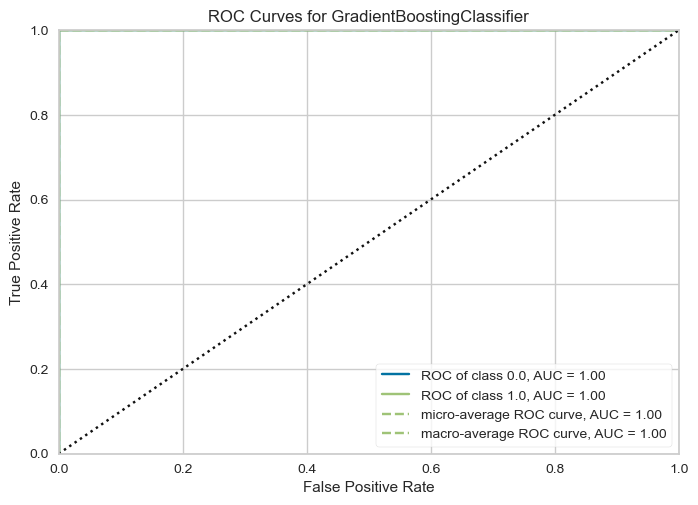

##########################################################################
Bagging_Classifer : 1.0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       1.00      1.00      1.00       183

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

Not suported
##########################################################################
knn_classifier : 1.0
--------------------------------------------------------------------------
--------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       327
         1.0       1.00      1.00      1.00       183

 

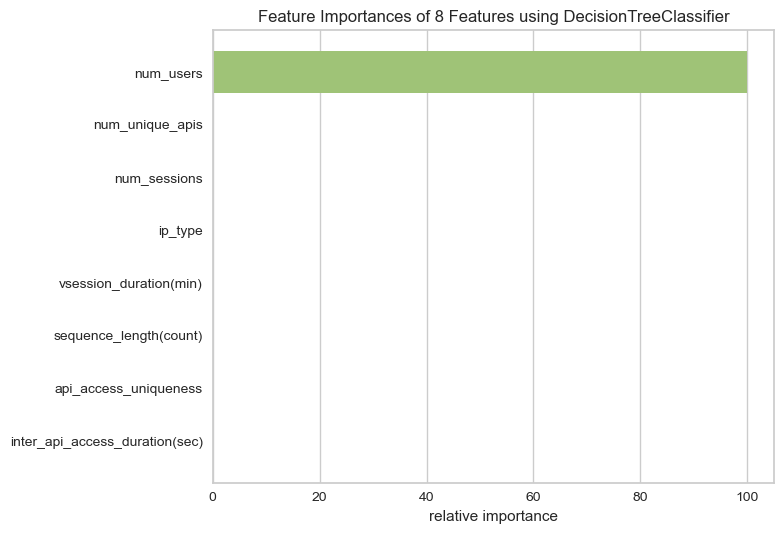

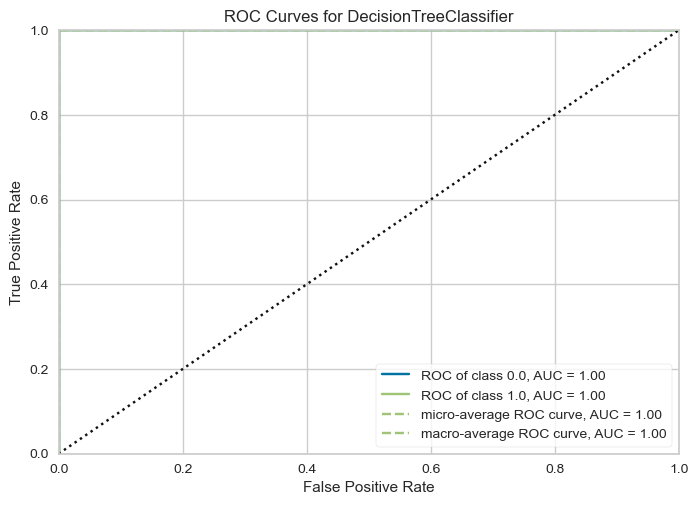

In [135]:
for model_name, model in models.items():
    train_model(model, model_name)

In [ ]:
import tensorflow as tf